In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
sent_path = "./data/fear_greed_index.csv"
hist_path = "./data/historical_data.csv"

db_sent, db_hist = pd.read_csv(sent_path), pd.read_csv(hist_path)

### Understand the data

In [4]:
db_sent.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
db_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
db_sent['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [7]:
# converting the timestamp and sorting the data according to it.
db_sent['date'] = pd.to_datetime(db_sent['timestamp'], unit='s')
db_sent = db_sent.sort_values('date')
db_sent.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01 05:30:00
1,1517549400,15,Extreme Fear,2018-02-02 05:30:00
2,1517635800,40,Fear,2018-02-03 05:30:00
3,1517722200,24,Extreme Fear,2018-02-04 05:30:00
4,1517808600,11,Extreme Fear,2018-02-05 05:30:00


In [8]:
db_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
db_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
db_hist['timestamp'] = pd.to_datetime(db_hist['Timestamp IST'], dayfirst=True)
db_hist = db_hist.sort_values('timestamp')
db_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
83771,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.07220,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
83769,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.09670,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
39063,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,05-12-2023 03:11,-0.0150,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,6.092654,2.830000e+14,1.700000e+12,2023-12-05 03:11:00
39062,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,05-12-2023 03:11,0.0000,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,0.157001,1.070000e+15,1.700000e+12,2023-12-05 03:11:00


In [11]:
## Printing date both in sentiment dataset and trade dataset
print(db_sent['date'].min(), db_sent['date'].max())
print(db_hist['timestamp'].min(), db_hist['timestamp'].max())

2018-02-01 05:30:00 2025-05-02 05:30:00
2023-05-01 01:06:00 2025-05-01 12:13:00


In [12]:
## Changing the column names of trade for simplicity
db_hist = db_hist.rename(columns={
    "Account": "account",
    "Coin": "symbol",
    "Execution Price": "price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Closed PnL": "pnl",
    "Fee": "fee"
})

In [13]:
db_hist.drop_duplicates(subset='Order ID').head()

,account,symbol,price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,pnl,Transaction Hash,Order ID,Crossed,fee,Trade ID,Timestamp,timestamp
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,01-05-2023 01:06,0.09670,Open Long,0.000000,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
39063,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,05-12-2023 03:11,-0.01500,Open Short,0.000000,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,6.092654,2.830000e+14,1.700000e+12,2023-12-05 03:11:00
39061,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2231.0,3.89320,8685.73,BUY,05-12-2023 03:11,7.31870,Open Long,0.000000,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,2.171432,1.060000e+15,1.700000e+12,2023-12-05 03:11:00
39064,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42748.0,0.01500,641.22,BUY,14-12-2023 01:20,-0.59711,Close Short,-13.230000,0xaa5402f2a57de3b0357b04068cff0e0112004938d7f4...,4626056690,True,0.160305,8.320000e+14,1.700000e+12,2023-12-14 01:20:00
39066,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2252.3,11.21190,25252.56,SELL,14-12-2023 01:20,11.21190,Close Long,245.428491,0xbde1c54544084c04304604068cff13011400d81cb2b8...,4626057386,True,6.313140,6.790000e+14,1.700000e+12,2023-12-14 01:20:00


In [14]:
# filtering garbage of unneccasry trades
db_hist = db_hist[db_hist['size_usd'] > 0]
db_hist = db_hist.dropna(subset=['pnl'])
db_hist.head()

,account,symbol,price,size_tokens,size_usd,side,Timestamp IST,Start Position,Direction,pnl,Transaction Hash,Order ID,Crossed,fee,Trade ID,Timestamp,timestamp
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
83771,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.07220,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
83769,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.09670,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,2023-05-01 01:06:00
39063,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,05-12-2023 03:11,-0.0150,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,6.092654,2.830000e+14,1.700000e+12,2023-12-05 03:11:00
39062,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,05-12-2023 03:11,0.0000,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,0.157001,1.070000e+15,1.700000e+12,2023-12-05 03:11:00


In [15]:
db_hist['is_win'] = db_hist['pnl'] > 0
db_hist['abs_pnl'] = db_hist['pnl'].abs()

In [16]:
db_sent = db_sent.sort_values('date')
db_hist = db_hist.sort_values('timestamp')

In [17]:
## create d a merged dataset after merging both dataset based on timestamp and date
merged = pd.merge_asof(
    db_hist, db_sent, left_on='timestamp', right_on='date', direction='backward'
)

In [18]:
merged.isna().sum()

account             0
symbol              0
price               0
size_tokens         0
size_usd            0
side                0
Timestamp IST       0
Start Position      0
Direction           0
pnl                 0
Transaction Hash    0
Order ID            0
Crossed             0
fee                 0
Trade ID            0
Timestamp           0
timestamp_x         0
is_win              0
abs_pnl             0
timestamp_y         0
value               0
classification      0
date                0
dtype: int64

In [19]:
# getting stats for all regimes
merged.groupby("classification").agg({
    "pnl": ["mean", "sum"],
    "is_win": "mean",
    "size_usd": "mean"
})

pnl                  is_win     size_usd
                     mean           sum      mean         mean
classification                                                
Extreme Fear    50.337228  1.072334e+06  0.417875  5465.257597
Extreme Greed   65.104588  2.615121e+06  0.463404  3165.824621
Fear            46.635166  2.868016e+06  0.420739  7908.235203
Greed           50.145186  2.439463e+06  0.393356  5539.918171
Neutral         32.910163  1.302025e+06  0.362510  4846.490928

In [20]:
## getting stats for all the accounts
account_perf = merged.groupby(["account", "classification"]).agg(
    total_pnl=("pnl", "sum"),
    winrate=("is_win", "mean"),
    trades=("pnl", "count"),
    avg_size=("size_usd", "mean")
).reset_index()

In [21]:
account_perf.head()

,account,classification,total_pnl,winrate,trades,avg_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,124769.221441,0.370000,100,15071.008600
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-40282.335904,0.066667,945,12080.270550
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,893370.500517,0.480878,1412,13953.615021
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,421078.827447,0.418322,906,22415.592472
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,201293.606478,0.472527,455,19259.947802


In [22]:
# seperating the top traders
threshold = account_perf["total_pnl"].quantile(0.9)
top_traders = account_perf[account_perf["total_pnl"] >= threshold]

In [23]:
top_traders

,account,classification,total_pnl,winrate,trades,avg_size
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,8.933705e+05,0.480878,1412,13953.615021
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,4.210788e+05,0.418322,906,22415.592472
55,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Extreme Fear,2.404984e+05,0.435383,797,12404.616750
57,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Fear,2.137583e+05,0.388856,1669,10603.590102
67,0x513b8629fe877bb581bf244e326a047b249c4ff1,Fear,3.665821e+05,0.381693,6369,37877.119585
69,0x513b8629fe877bb581bf244e326a047b249c4ff1,Neutral,3.570523e+05,0.521666,2977,26662.964871
78,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Greed,4.535953e+05,0.348148,540,9274.808222
86,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Greed,2.202211e+05,0.840325,3814,3311.644009
135,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Extreme Greed,1.002440e+06,0.508750,1600,3665.930756
137,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,7.967292e+05,0.293161,6024,5902.014758


#### BoxPlot : PNL vs Sentiments Regime

In [24]:
## BoxPlot :  PNL vs classification
regimes = merged['classification'].dropna().unique()
data = [
    merged.loc[merged['classification'] == r, 'pnl']
    for r in regimes]

C:\Users\praty\AppData\Local\Temp\ipykernel_22588\3039276004.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=regimes, showfliers=True)


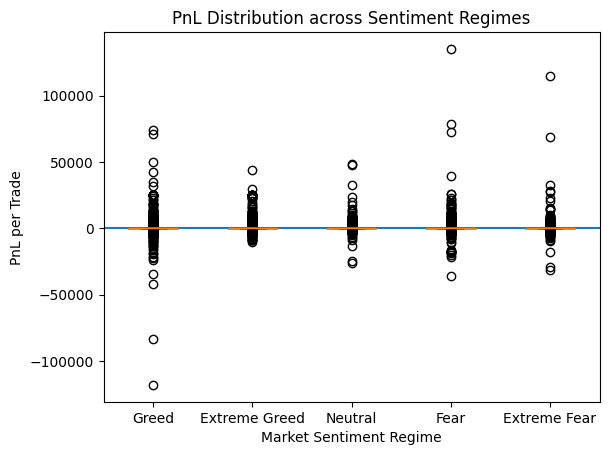

In [26]:
plt.figure()
plt.boxplot(data, labels=regimes, showfliers=True)
plt.axhline(0)
plt.xlabel("Market Sentiment Regime")
plt.ylabel("PnL per Trade")
plt.title("PnL Distribution across Sentiment Regimes")
plt.show();

#### Bar Chart: Win Rate vs Sentiment Regime

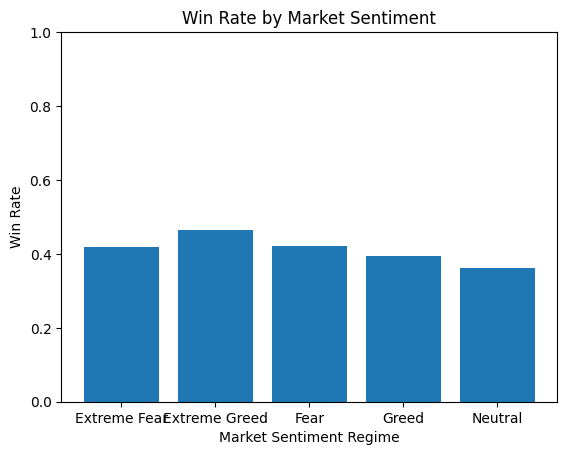

In [38]:
## Bar Chart: Win Rate vs Regime
winrate = (
    merged
    .groupby("classification")["is_win"]
    .mean()
)

plt.figure()
plt.bar(winrate.index, winrate.values)
plt.xlabel("Market Sentiment Regime")
plt.ylabel("Win Rate")
plt.title("Win Rate by Market Sentiment")
plt.ylim(0, 1)
plt.show()

#### Bar chart : Avg Position size vs Regime

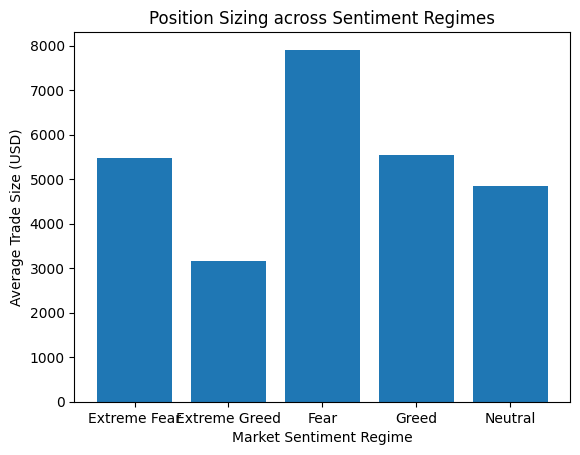

In [39]:
## Bar Chart: Avg position size vs Regime
avg_size = (
    merged
    .groupby("classification")["size_usd"]
    .mean()
)

plt.figure()
plt.bar(avg_size.index, avg_size.values)
plt.xlabel("Market Sentiment Regime")
plt.ylabel("Average Trade Size (USD)")
plt.title("Position Sizing across Sentiment Regimes")
plt.show()

In [40]:
## The number of trades in each sentiment regime
trade_count = merged.groupby('classification').size()
trade_count

classification
Extreme Fear     21303
Extreme Greed    40168
Fear             61499
Greed            48648
Neutral          39563
dtype: int64

In [ ]:
## Trade per account in different regimes
trades_peraccount = (
    merged.groupby(
        ['classification', 'account']
    ).size().groupby('classification').mean()
)

trades_peraccount

classification
Extreme Fear      665.718750
Extreme Greed    1338.933333
Fear             1921.843750
Greed            1569.290323
Neutral          1276.225806
dtype: float64

In [ ]:
## Expected Value of trades from different regimes
ev = merged.groupby('classification').apply(
    lambda x: x['pnl'].mean()
)

ev

C:\Users\praty\AppData\Local\Temp\ipykernel_22460\1070899894.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ev = merged.groupby('classification').apply(


classification
Extreme Fear     50.337228
Extreme Greed    65.104588
Fear             46.635166
Greed            50.145186
Neutral          32.910163
dtype: float64

In [42]:
## Seperating top and bottom traders on the basis of profitablity
merged['pnl_rank'] = merged.groupby('account')['pnl'].transform('sum')

top = merged[merged['pnl_rank'] >= merged['pnl_rank'].quantile(0.9)]
bottom = merged[merged['pnl_rank'] <= merged['pnl_rank'].quantile(0.1)]

top, bottom

(                                           account symbol    price  \
 3       0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    BTC  41866.0   
 4       0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    BTC  41867.0   
 5       0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    ETH   2231.0   
 6       0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    ETH   2230.1   
 7       0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    ETH   2230.1   
 ...                                            ...    ...      ...   
 210574  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   HYPE     20.1   
 210576  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   HYPE     20.1   
 210577  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   HYPE     20.1   
 210578  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   HYPE     20.1   
 210579  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23   HYPE     20.1   
 
         size_tokens  size_usd  side     Timestamp IST  Start Position  \
 3           0.58211  24370.62  SELL  05-12-2023 03:11         -0.0150  

In [43]:
## Trade per account based for top and bottom traders

top_trades_per_acc = (
    top.groupby(["classification", "account"])
       .size()
       .groupby("classification")
       .mean()
)

bottom_trades_per_acc = (
    bottom.groupby(["classification", "account"])
          .size()
          .groupby("classification")
          .mean()
)

In [44]:
top_trades_per_acc

classification
Extreme Fear     1941.000000
Extreme Greed    1272.500000
Fear             5086.666667
Greed            2312.000000
Neutral          3059.333333
dtype: float64

In [45]:
bottom_trades_per_acc

classification
Extreme Fear      774.000000
Extreme Greed     638.714286
Fear             1328.250000
Greed            1210.857143
Neutral           619.500000
dtype: float64

In [46]:
## Expected Value per trade for both (top and bottom traders)
ev_top = top.groupby('classification')['pnl'].mean()
ev_bottom = bottom.groupby('classification')['pnl'].mean()

In [47]:
ev_top

classification
Extreme Fear     109.660013
Extreme Greed    378.058084
Fear              89.158709
Greed            175.578796
Neutral           54.989291
Name: pnl, dtype: float64

In [48]:
ev_bottom

classification
Extreme Fear    -21.670060
Extreme Greed    19.519816
Fear             29.422201
Greed           -41.842568
Neutral         -12.674336
Name: pnl, dtype: float64

In [49]:
## Buy vs Sell ratio by regime

side_ratio = (
    merged 
    .groupby(['classification', 'side'])
    .size().unstack()
)

side_ratio["buy_ratio"] = side_ratio["BUY"] / side_ratio.sum(axis=1)
side_ratio["sell_ratio"] = side_ratio["SELL"] / side_ratio.sum(axis=1)

side_ratio[["buy_ratio", "sell_ratio"]]

side,buy_ratio,sell_ratio
classification,,
Extreme Fear,0.466319,0.533669
Extreme Greed,0.456284,0.543710
Fear,0.476756,0.523240
Greed,0.492970,0.507025
Neutral,0.534135,0.465858


In [50]:
## Buy vs Sell Expected Value by regime
side_ev = (
    merged
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

side_ev

side,BUY,SELL
classification,,
Extreme Fear,32.672520,65.772290
Extreme Greed,11.626363,109.983201
Fear,60.196939,34.278313
Greed,37.085721,62.842505
Neutral,24.408029,42.658255


In [51]:
## Buy vs Sell Behavior For Top vs Bottom Trades
top_side_ev = (
    top
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

bottom_side_ev = (
    bottom
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

top_side_ev, bottom_side_ev

(side                   BUY        SELL
 classification                        
 Extreme Fear     44.624185  169.732749
 Extreme Greed    -1.701116  529.627726
 Fear            142.261039   44.334567
 Greed           202.201058  150.579026
 Neutral          84.483517    5.677694,
 side                  BUY       SELL
 classification                      
 Extreme Fear    -8.708940 -32.831349
 Extreme Greed    9.007071  26.447696
 Fear            54.968249  11.199739
 Greed          -80.675167   4.972793
 Neutral        -37.077432   8.236074)

In [94]:
## Seperating the dataset into two different parts to confirm that the numbers and results stays same accross dataset
cutoff = db_hist["timestamp"].quantile(0.5)

early = db_hist[db_hist["timestamp"] <= cutoff]
late  = db_hist[db_hist["timestamp"] > cutoff]

In [95]:
## We are now going to replicate the above analysis on both dataset to see if the results still are the same on not
merged_1 = pd.merge_asof(
    early, db_sent, left_on='timestamp', right_on='date', direction='backward'
)
merged_2 = pd.merge_asof(
    late, db_sent, left_on='timestamp', right_on='date', direction='backward'
)

In [96]:
merged_1.groupby("classification").agg({
    "pnl": ["mean", "sum"],
    "is_win": "mean",
    "size_usd": "mean"
})

pnl                  is_win     size_usd
                     mean           sum      mean         mean
classification                                                
Extreme Fear    45.898862  5.829156e+03  0.244094  2831.138425
Extreme Greed   65.104588  2.615121e+06  0.463404  3165.824621
Fear            23.267136  2.159190e+05  0.369181  3806.763369
Greed           72.159259  2.563241e+06  0.403637  4176.328656
Neutral         43.718081  9.026472e+05  0.399816  2838.110288

In [97]:
merged_2.groupby("classification").agg({
    "pnl": ["mean", "sum"],
    "is_win": "mean",
    "size_usd": "mean"
})

pnl                  is_win     size_usd
                     mean           sum      mean         mean
classification                                                
Extreme Fear    50.363847  1.066505e+06  0.418918  5481.055346
Fear            50.787971  2.652097e+06  0.429901  8637.120449
Greed           -9.430001 -1.237782e+05  0.365534  9230.107622
Neutral         21.113214  3.993776e+05  0.321791  7038.658144

#### Box Plot : Pnl vs Sentiment Regime (for both early and late)

In [98]:
regimes = merged_1['classification'].dropna().unique()

data_1 = [
    merged_1.loc[merged_1['classification'] == r, 'pnl']
    for r in regimes]

data_2 = [
    merged_2.loc[merged_2['classification'] == r, 'pnl']
    for r in regimes]

C:\Users\praty\AppData\Local\Temp\ipykernel_13764\3753039719.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(data_1, labels=regimes, showfliers=True)
C:\Users\praty\AppData\Local\Temp\ipykernel_13764\3753039719.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_2, labels=regimes, showfliers=True)


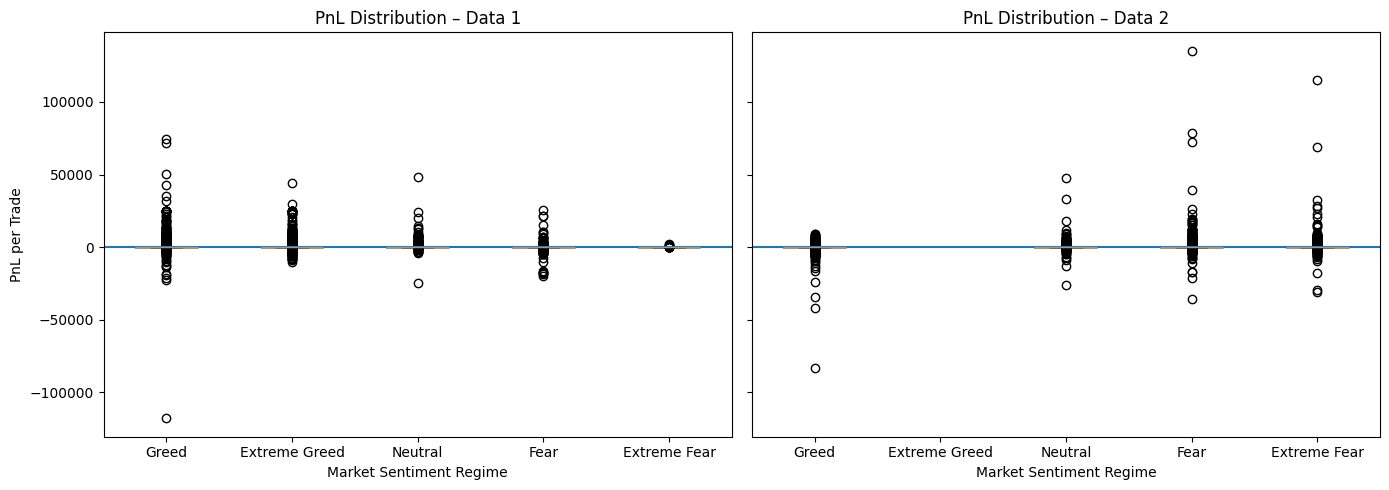

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Data 1
axes[0].boxplot(data_1, labels=regimes, showfliers=True)
axes[0].axhline(0)
axes[0].set_title("PnL Distribution – Data 1")
axes[0].set_xlabel("Market Sentiment Regime")
axes[0].set_ylabel("PnL per Trade")

# Data 2
axes[1].boxplot(data_2, labels=regimes, showfliers=True)
axes[1].axhline(0)
axes[1].set_title("PnL Distribution – Data 2")
axes[1].set_xlabel("Market Sentiment Regime")

plt.tight_layout()
plt.show();

#### Bar Chart: Win Rate vs Sentiment Regime (early vs late)

In [100]:
winrate_1 = (
    merged_1
    .groupby("classification")["is_win"]
    .mean()
)

winrate_2 = (
    merged_2
    .groupby("classification")["is_win"]
    .mean()
)

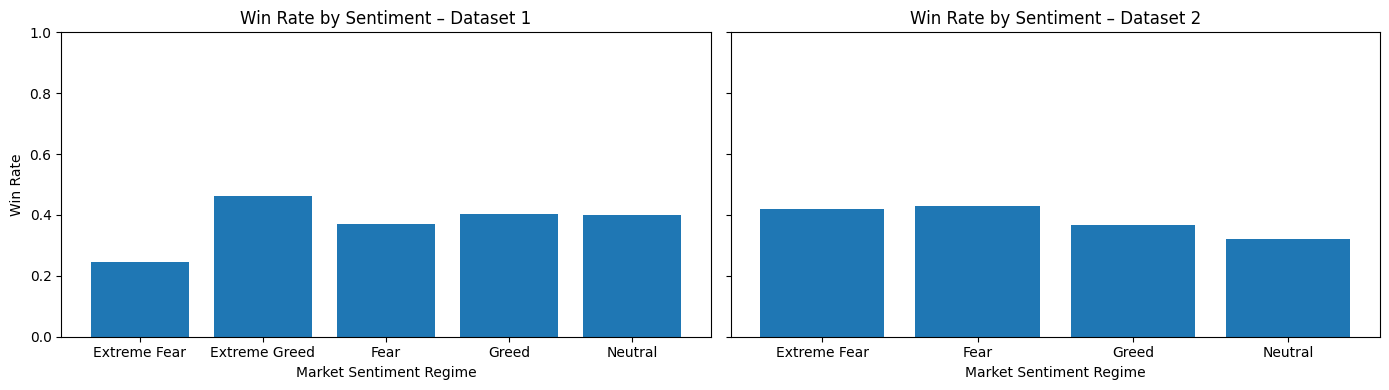

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Winrate 1
axes[0].bar(winrate_1.index, winrate_1.values)
axes[0].set_title("Win Rate by Sentiment – Dataset 1")
axes[0].set_xlabel("Market Sentiment Regime")
axes[0].set_ylabel("Win Rate")
axes[0].set_ylim(0, 1)

# Winrate 2
axes[1].bar(winrate_2.index, winrate_2.values)
axes[1].set_title("Win Rate by Sentiment – Dataset 2")
axes[1].set_xlabel("Market Sentiment Regime")
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [103]:
# calculating trade, trade per account and expected values of trade for both early and late

trade_count1 = merged_1.groupby('classification').size()
trades_peraccount_1 = (
    merged_1.groupby(
        ['classification', 'account']
    ).size().groupby('classification').mean()
)
ev_1 = merged_1.groupby('classification').apply(
    lambda x: x['pnl'].mean()
)

C:\Users\praty\AppData\Local\Temp\ipykernel_13764\52062285.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ev_1 = merged_1.groupby('classification').apply(


In [104]:
trade_count1, trades_peraccount_1, ev_1

(classification
 Extreme Fear       127
 Extreme Greed    40168
 Fear              9280
 Greed            35522
 Neutral          20647
 dtype: int64,
 classification
 Extreme Fear       31.750000
 Extreme Greed    1338.933333
 Fear              441.904762
 Greed            1268.642857
 Neutral           764.703704
 dtype: float64,
 classification
 Extreme Fear     45.898862
 Extreme Greed    65.104588
 Fear             23.267136
 Greed            72.159259
 Neutral          43.718081
 dtype: float64)

In [105]:
trade_count2 = merged_2.groupby('classification').size()
trades_peraccount_2 = (
    merged_2.groupby(
        ['classification', 'account']
    ).size().groupby('classification').mean()
)
ev_2 = merged_2.groupby('classification').apply(
    lambda x: x['pnl'].mean()
)

C:\Users\praty\AppData\Local\Temp\ipykernel_13764\4190084614.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ev_2 = merged_2.groupby('classification').apply(


In [106]:
trade_count2, trades_peraccount_2, ev_2

(classification
 Extreme Fear    21176
 Fear            52219
 Greed           13126
 Neutral         18916
 dtype: int64,
 classification
 Extreme Fear     661.750000
 Fear            1631.843750
 Greed            570.695652
 Neutral          630.533333
 dtype: float64,
 classification
 Extreme Fear    50.363847
 Fear            50.787971
 Greed           -9.430001
 Neutral         21.113214
 dtype: float64)

In [107]:
## Seperating top and bottom traders on the basis of pnl for both early and late dataset
merged_1['pnl_rank'] = merged_1.groupby('account')['pnl'].transform('sum')
merged_2['pnl_rank'] = merged_2.groupby('account')['pnl'].transform('sum')

top_1 = merged_1[merged_1['pnl_rank'] >= merged_1['pnl_rank'].quantile(0.9)]
bottom_1 = merged_1[merged_1['pnl_rank'] <= merged_1['pnl_rank'].quantile(0.1)]

top_2 = merged_2[merged_2['pnl_rank'] >= merged_2['pnl_rank'].quantile(0.9)]
bottom_2 = merged_2[merged_2['pnl_rank'] <= merged_2['pnl_rank'].quantile(0.1)]

In [108]:
## Trade per account based for top and bottom traders

top_trades_per_acc_1 = (
    top_1.groupby(["classification", "account"])
       .size()
       .groupby("classification")
       .mean()
)

bottom_trades_per_acc_1 = (
    bottom_1.groupby(["classification", "account"])
          .size()
          .groupby("classification")
          .mean()
)

In [109]:
top_trades_per_acc_2 = (
    top_2.groupby(["classification", "account"])
       .size()
       .groupby("classification")
       .mean()
)

bottom_trades_per_acc_2 = (
    bottom_2.groupby(["classification", "account"])
          .size()
          .groupby("classification")
          .mean()
)

In [110]:
top_trades_per_acc_1, bottom_trades_per_acc_1

(classification
 Extreme Fear       95.0
 Extreme Greed    1600.0
 Fear             1637.0
 Greed            5951.0
 Neutral          2496.0
 dtype: float64,
 classification
 Extreme Fear      27.000000
 Extreme Greed    498.666667
 Fear             140.142857
 Greed            586.000000
 Neutral          443.600000
 dtype: float64)

In [111]:
top_trades_per_acc_2, bottom_trades_per_acc_2

(classification
 Extreme Fear    2571.0
 Fear            5322.5
 Greed              2.0
 Neutral         1707.0
 dtype: float64,
 classification
 Extreme Fear     555.00
 Fear            1080.50
 Greed            885.00
 Neutral          781.25
 dtype: float64)

In [112]:
## Expected Value per trade for both (top and bottom traders)
ev_top_1 = top_1.groupby('classification')['pnl'].mean()
ev_bottom_1 = bottom_1.groupby('classification')['pnl'].mean()

ev_top_1, ev_bottom_1

(classification
 Extreme Fear      59.088428
 Extreme Greed    626.525100
 Fear               8.301888
 Greed            116.664258
 Neutral          111.218044
 Name: pnl, dtype: float64,
 classification
 Extreme Fear      7.990918
 Extreme Greed    30.381991
 Fear             52.573918
 Greed            19.752664
 Neutral          11.002202
 Name: pnl, dtype: float64)

In [113]:
## Expected Value per trade for both (top and bottom traders)
ev_top_2 = top_2.groupby('classification')['pnl'].mean()
ev_bottom_2 = bottom_2.groupby('classification')['pnl'].mean()

ev_top_2, ev_bottom_2

(classification
 Extreme Fear    120.894713
 Fear            120.053091
 Greed             3.296769
 Neutral          34.542867
 Name: pnl, dtype: float64,
 classification
 Extreme Fear     -4.140905
 Fear             33.345066
 Greed          -106.091562
 Neutral         -37.843087
 Name: pnl, dtype: float64)

In [114]:
### Buy vs Sell Ratio by regime fo r both dataset 

side_ratio_1 = (
    merged_1
    .groupby(['classification', 'side'])
    .size().unstack()
)

side_ratio_1["buy_ratio"] = side_ratio_1["BUY"] / side_ratio_1.sum(axis=1)
side_ratio_1["sell_ratio"] = side_ratio_1["SELL"] / side_ratio_1.sum(axis=1)

side_ratio_1[["buy_ratio", "sell_ratio"]]

side,buy_ratio,sell_ratio
classification,,
Extreme Fear,0.157480,0.841476
Extreme Greed,0.456284,0.543710
Fear,0.500108,0.499865
Greed,0.452339,0.547654
Neutral,0.524580,0.475408


In [115]:
side_ratio_2 = (
    merged_2 
    .groupby(['classification', 'side'])
    .size().unstack()
)

side_ratio_2["buy_ratio"] = side_ratio_2["BUY"] / side_ratio_2.sum(axis=1)
side_ratio_2["sell_ratio"] = side_ratio_2["SELL"] / side_ratio_2.sum(axis=1)

side_ratio_2[["buy_ratio", "sell_ratio"]]

side,buy_ratio,sell_ratio
classification,,
Extreme Fear,0.468172,0.531817
Fear,0.472606,0.527389
Greed,0.602925,0.397056
Neutral,0.544565,0.455421


In [116]:
## Buy vs Sell Expected Value by regime
side_ev_1 = (
    merged_1
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

side_ev_2 = (
    merged_2
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

side_ev_1, side_ev_2

(side                  BUY        SELL
 classification                       
 Extreme Fear     0.000000   54.478089
 Extreme Greed   11.626363  109.983201
 Fear            61.766798  -15.249124
 Greed           77.105136   68.074219
 Neutral         40.012203   47.807157,
 side                  BUY       SELL
 classification                      
 Extreme Fear    32.738432  65.879596
 Fear            59.901720  42.621007
 Greed          -44.166736  43.314919
 Neutral          8.001001  36.791556)

In [117]:
## Buy vs Sell Behavior For Top vs Bottom Trades
top_side_ev_1 = (
    top_1
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

bottom_side_ev_1 = (
    bottom_1
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

top_side_ev_1, bottom_side_ev_1

(side                   BUY        SELL
 classification                        
 Extreme Fear      0.000000   70.167509
 Extreme Greed    81.348595  860.172173
 Fear             27.937517  -11.071615
 Greed            73.930144  155.153622
 Neutral         219.119330   -2.362257,
 side                  BUY       SELL
 classification                      
 Extreme Fear     0.000000   8.298261
 Extreme Greed    8.455389  44.700910
 Fear            37.586953  63.747473
 Greed           30.042985  12.876472
 Neutral         14.448150   6.958573)

In [ ]:
## Buy vs Sell Behavior For Top vs Bottom Trades
top_side_ev_2= (
    top_2
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

bottom_side_ev_2 = (
    bottom_2
    .groupby(["classification", "side"])["pnl"]
    .mean()
    .unstack()
)

top_side_ev_2, bottom_side_ev_2

(side                   BUY        SELL
 classification                        
 Extreme Fear     48.378915  193.863205
 Fear            174.655993   69.661794
 Greed                  NaN    3.296769
 Neutral          45.405179   11.631103,
 side                   BUY       SELL
 classification                       
 Extreme Fear     50.858806 -33.932415
 Fear             90.712019  -1.253845
 Greed          -144.169753   0.152299
 Neutral         -78.415577   2.963775)